In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load the dataset
file_path = 'Cleaned_Steam_Dataset.xlsx'
data = pd.read_excel(file_path)
data

,Title,Game's Age (Days),Price,Developer,Publisher,Followers,User Review (On a scale of 1 to 7),User Reviews Count,Net Revenue (in million $),User Ratings
0,Red Dead Redemption 2,1786,99.99,Rockstar Games,Rockstar Games,800322,6,578915,1100,9
1,Grand Theft Auto V,3482,29.99,Rockstar North,Rockstar Games,3240105,6,1728306,990,9
2,ELDEN RING,974,59.99,"FromSoftware, Inc.","FromSoftware, Inc., Bandai Namco Entertainment",1011933,6,712931,820,9
3,Black Myth: Wukong,67,59.99,Game Science,Game Science,1222760,7,709346,820,10
4,Cyberpunk 2077,1416,59.99,CD PROJEKT RED,CD PROJEKT RED,1437630,6,687290,790,9
...,...,...,...,...,...,...,...,...,...,...
254,NBA 2K21,1200,49.99,Visual Concepts,2K,300000,2,50000,2,6
255,Postal III,4000,10.99,Trashmasters,Akella,18000,1,7000,1,6
256,Ride to Hell: Retribution,3700,19.99,Eutechnyx,Deep Silver,12000,1,5000,1,5
257,War Z,3900,5.99,Hammerpoint Interactive,OP Productions,22000,1,12000,1,6


In [84]:
# Data preprocessing
# Encode categorical variables (Developer and Publisher)
label_encoder = LabelEncoder()
data['Developer'] = label_encoder.fit_transform(data['Developer'])
data['Publisher'] = label_encoder.fit_transform(data['Publisher'])

In [86]:
# Define features and target variable
X = data[['Game\'s Age (Days)', 'Price', 'Developer', 'Publisher', 'Followers',
          'User Review (On a scale of 1 to 7)', 'User Reviews Count', 'Net Revenue (in million $)']]
y = data['User Ratings']

In [88]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [92]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)


In [94]:
# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
# Predict on the test data
predictions = knn.predict(X_test)

In [98]:
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7307692307692307
Precision: 0.7270345596432554
Recall: 0.7307692307692307
F1 Score: 0.7133388224607321


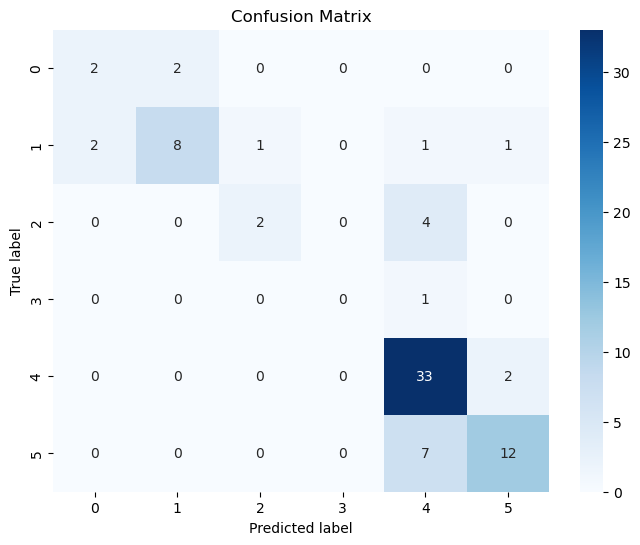

In [102]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [104]:
# ROC Curve (for multi-class, consider only one class vs others approach)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


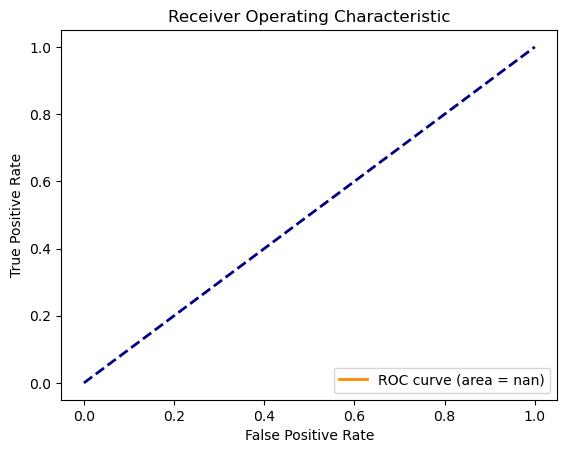

In [112]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [108]:
# Prediction for new data
def predict_new_data(new_data):
    new_data_scaled = scaler.transform([new_data])
    prediction_numeric = knn.predict(new_data_scaled)
    return prediction_numeric

In [110]:
# Example: Predicting for a new game
new_data = [365, 59.99, 3, 5, 5000000, 6, 100000, 800] 
predicted_class = predict_new_data(new_data)
print(f'Predicted Class for new data {new_data}: {predicted_class}')

Predicted Class for new data [365, 59.99, 3, 5, 5000000, 6, 100000, 800]: [8]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
Explanation of Each Value:
365: Game's age in days (1 year old).
59.99: Price of the game in dollars.
3: Encoded developer (a specific developer from your dataset after encoding).
5: Encoded publisher (a specific publisher from your dataset after encoding).
5000000: Number of followers for the game.
6: User review score on a scale of 1 to 7.
10000: Number of user reviews.
800: Net revenue in millions of dollars.